In [1]:
import torch
import torch.nn as nn

In [2]:
torch.randn(4)

tensor([-1.7906, -2.1736,  0.8170,  0.3212])

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.input = conv_block(in_channels, 64)

        self.conv1 = conv_block(64, 64, pool=True)
        self.res1 = nn.Sequential(conv_block(64, 32), conv_block(32, 64))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv2 = conv_block(64, 64, pool=True)
        self.res2 = nn.Sequential(conv_block(64, 32), conv_block(32, 64))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(64, 64, pool=True)
        self.res3 = nn.Sequential(conv_block(64, 32), conv_block(32, 64))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(64, num_classes))
        
    def forward(self, xb):
        out = self.input(xb)

        out = self.conv1(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv2(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv3(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        return self.classifier(out)

In [2]:
model = torch.load('./emotion_detection_model_state.pth')

In [4]:
print(model)

OrderedDict([('input.0.weight', tensor([[[[ 0.2494, -0.0034,  0.2216],
          [ 0.1971, -0.2936,  0.0223],
          [-0.0363,  0.0380, -0.2277]]],


        [[[-0.0606,  0.0403,  0.0382],
          [-0.1639,  0.1317, -0.1804],
          [-0.1820,  0.1667,  0.2255]]],


        [[[-0.1639, -0.1973,  0.0439],
          [ 0.2643, -0.2236, -0.1309],
          [ 0.3653, -0.2487,  0.2781]]],


        [[[-0.1749,  0.3234, -0.0825],
          [ 0.0117,  0.3079, -0.1664],
          [ 0.1067, -0.1964, -0.2400]]],


        [[[-0.1158, -0.0045, -0.3111],
          [ 0.0352,  0.2439,  0.0125],
          [ 0.0747,  0.2052,  0.2016]]],


        [[[-0.3230, -0.0058,  0.2669],
          [ 0.2193, -0.1752, -0.0845],
          [-0.2942,  0.1748,  0.2249]]],


        [[[-0.2498, -0.1165, -0.2146],
          [ 0.1291,  0.2320,  0.2339],
          [-0.0683,  0.1054, -0.0764]]],


        [[[ 0.2483,  0.1778,  0.3301],
          [-0.1449,  0.2764, -0.2523],
          [-0.2811, -0.2458, -0.1143]]],




In [3]:
from gymnasium.envs.registration import register
register(
        id="MiniGrid-Dynamic-Obstacles-Random-10x10-v0",
        entry_point="minigrid.envs:DynamicObstaclesEnv",
    )

c:\Users\hxri\miniconda3\envs\cogppo\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MiniGrid-Dynamic-Obstacles-Random-10x10-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
from minigrid.wrappers import ViewSizeWrapper
import gymnasium as gym

In [45]:
agent_view_size = 7
max_steps = 10000
n_obstacles = 5
size = 10
agent_start_pos = None

env = gym.make( 'MiniGrid-Dynamic-Obstacles-Random-10x10-v0',
                render_mode="rgb_array",
                max_steps=max_steps,
                agent_view_size=agent_view_size,
                n_obstacles=n_obstacles,
                size=size,
                agent_start_pos=agent_start_pos)
obs  = env.reset()

c:\Users\hxri\miniconda3\envs\cogppo\Lib\site-packages\gymnasium\envs\registration.py:523: DeprecationWarning: WARN: The environment MiniGrid-Dynamic-Obstacles-Random-10x10-v0 is out of date. You should consider upgrading to version `v2`.
  logger.deprecation(


In [47]:
obs[0]['image'][..., 0]

array([[ 2,  2,  2,  2,  2,  1,  1],
       [ 2,  2,  2,  2,  2,  1,  1],
       [ 2,  2,  2,  2,  2,  1,  6],
       [ 2,  2,  2,  2,  2,  1, 10],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2]], dtype=uint8)

In [6]:
env.action_space.sample()

1

In [51]:
obs, reward, terminated, truncated, info = env.step(100)
obs['image'][..., 0]

array([[ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  1],
       [ 2,  2,  2,  2,  2,  2, 10],
       [ 2,  2,  2,  2,  2,  2,  1],
       [ 2,  2,  2,  2,  2,  2,  1],
       [ 2,  2,  2,  2,  2,  2,  1]], dtype=uint8)

In [49]:
reward

-0.0001

In [28]:
apos

(1, 2)

In [33]:
next_obs = torch.Tensor(env.reset()[0]['image'])

In [35]:
next_obs.shape

torch.Size([7, 7, 3])

In [4]:
rs = env.reset()

In [36]:
from torch.distributions import Categorical

In [50]:
tens = torch.tensor([0.1, 0.1, 0.56, 0.19, 0.56])
out = Categorical(tens)
print(out.sample())

tensor(2)


In [16]:
import numpy as np

np.shape(rs[0]['image'])

(7, 7, 3)

In [4]:
from gymnasium import envs
print(envs.registry.keys())

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS9N1-v0', 'MiniGrid-LavaCrossingS9N2-v0', 'MiniGrid-Lav

In [20]:
import torch

# Create the original tensor
original_tensor = torch.randn(4, 1, 2)

# Reshape the tensor
reshaped_tensor = original_tensor.view(4, 2)

# Print the reshaped tensor
print(original_tensor)
print(reshaped_tensor)  # Output: torch.Size([4, 2])

tensor([[[ 1.4642, -1.2805]],

        [[-1.4365,  2.4814]],

        [[-0.7850, -0.8860]],

        [[-1.3925,  0.6784]]])
tensor([[ 1.4642, -1.2805],
        [-1.4365,  2.4814],
        [-0.7850, -0.8860],
        [-1.3925,  0.6784]])


In [21]:
t = torch.tensor([[5.0000e-01, 1.5793e-04],
            [5.0000e-01, 1.5730e-04],
            [3.7754e-01, 1.5741e-04],
            [5.0000e-01, 1.5907e-04]])

In [22]:
t.shape

torch.Size([4, 2])

In [2]:
t = [-1,]
t.append(-1)
print(t)

[-1, -1]


In [3]:
import numpy as np

In [4]:
info = {'final_observation': np.array([{'image': np.array([[[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 1,  0,  0],
               [ 1,  0,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 1,  0,  0],
               [ 1,  0,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 1,  0,  0],
               [10,  0,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 1,  0,  0],
               [ 1,  0,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0]],

              [[ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 2,  5,  0],
               [ 1,  0,  0],
               [ 1,  0,  0]]], dtype='uint8'), 'direction': 0, 'mission': 'get to the green goal square'}],
      dtype=object), '_final_observation': np.array([ True]), 'final_info': np.array([{'goal_congruence': 0, 'coping_potential': 1.0, 'episode': {'r': np.array([0.7093], dtype='float32'), 'l': np.array([323]), 't': np.array([54.], dtype='float32')}}],
      dtype=object), '_final_info': np.array([ True])}

In [7]:
info['final_info'][0]['coping_potential']

1.0

In [12]:
import time
time.time()

1686739602.989821

In [6]:
import random
random.randint(0, 1)

1

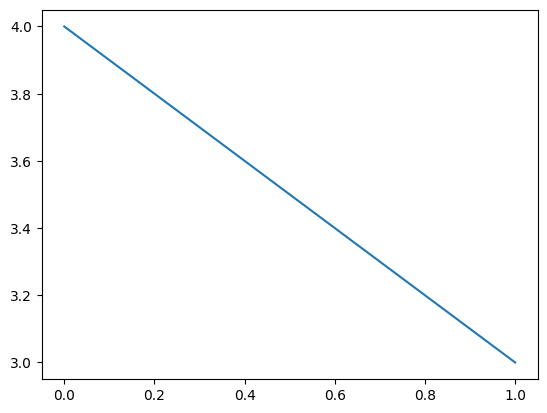

In [3]:
import matplotlib.pyplot as plt

temp = [4]
temp.append(3)
plt.plot(temp)

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

directory = "./temporal/"
imgs = []

for filename in os.listdir(directory):
    if filename.endswith(".png"): 
        imgs.append(cv2.imread(os.path.join(directory, filename), 0))
    else:
        continue

In [14]:
np.shape(imgs)

(64, 10, 10)

In [15]:
imgs[0].shape

(10, 10)

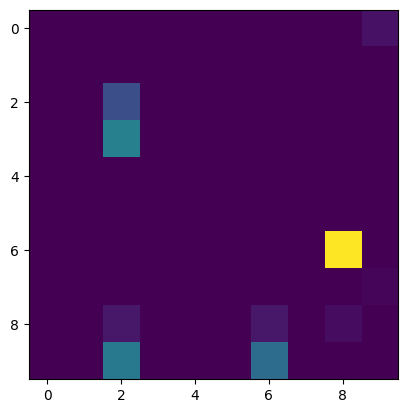

In [16]:
plt.imshow(imgs[0])

In [17]:
avg = np.average(imgs, axis=0)

In [18]:
np.shape(avg)

(10, 10)

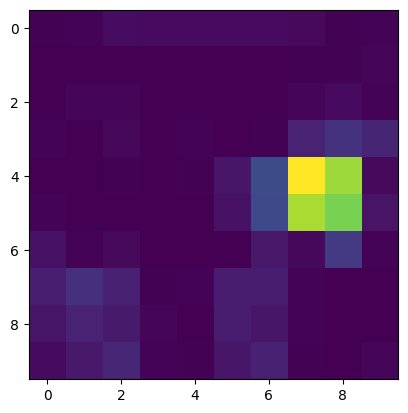

In [20]:
plt.imshow(avg)

In [24]:
normalizedImg = np.zeros((10, 10))
normalizedImg = cv2.normalize(avg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('tested.png', normalizedImg)

True

In [22]:
avg

array([[1.2500000e-01, 1.7187500e-01, 6.0937500e-01, 5.9375000e-01,
        5.9375000e-01, 5.9375000e-01, 5.9375000e-01, 4.5312500e-01,
        1.2500000e-01, 2.0312500e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2500000e-01,
        7.8125000e-02, 2.3437500e-01],
       [0.0000000e+00, 2.5000000e-01, 2.3437500e-01, 4.6875000e-02,
        4.6875000e-02, 4.6875000e-02, 4.6875000e-02, 2.9687500e-01,
        5.6250000e-01, 2.0312500e-01],
       [1.7187500e-01, 3.1250000e-02, 4.2187500e-01, 3.1250000e-02,
        2.1875000e-01, 6.2500000e-02, 1.0937500e-01, 1.9375000e+00,
        2.8281250e+00, 2.0000000e+00],
       [0.0000000e+00, 4.6875000e-02, 9.3750000e-02, 6.2500000e-02,
        1.2500000e-01, 1.1250000e+00, 4.4218750e+00, 1.9187500e+01,
        1.6375000e+01, 5.0000000e-01],
       [2.0312500e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.2187500e-01, 4.2343750e+00, 1.67

In [6]:
r = [0.2, 0.1, 0.1, 0.2, 0.2, 0.2]
g = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

sum([a*b for a,b in zip(r,g)])

1.0

In [49]:
import numpy as np
p1 = np.array((0,0))
p2 = np.array((3,7))
np.linalg.norm(p2 - p1)

7.615773105863909

In [56]:
n = 7
fra = np.linalg.norm(np.array((0,0)) - np.array(((n-1)/2,n)))
p1 = np.array((0,0))
p2 = np.array((0,0))
1 - (np.linalg.norm(p1 - p2) / fra)

1.0

In [14]:
1 - 1 / 12.727922061357855

0.9214325798681614

In [18]:
probs = 0.001
probs * np.log(probs)

-0.006907755278982137

In [22]:
0.1 / (1 + 0.1)

0.09090909090909091

In [32]:
import torch

tensor1 = torch.randn(128, 1)
tensor2 = torch.randn(128, 6)

result = torch.mean((tensor1.unsqueeze(2) * tensor2.unsqueeze(1)), dim=2)
print(result.size())  # Output: torch.Size([128, 1])

torch.Size([128, 1])


In [41]:
torch.mean(tensor2, dim=1).unsqueeze(1).shape

torch.Size([128, 1])

In [43]:
torch.mul(tensor1, torch.mean(tensor2, dim=1).unsqueeze(1)).shape

torch.Size([128, 1])

In [38]:
import torch

# create two 2-D tensors
T1 = torch.Tensor([[8,7],[3,4]])
T2 = torch.Tensor([[0,3],[4,9]])
print("T1:\n", T1)
print("T2:\n", T2)

# Multiply above two 2-D tensors
v = torch.mul(T1,T2)
print("Element-wise subtraction result:\n", v)

T1:
 tensor([[8., 7.],
        [3., 4.]])
T2:
 tensor([[0., 3.],
        [4., 9.]])
Element-wise subtraction result:
 tensor([[ 0., 21.],
        [12., 36.]])


In [62]:
te = torch.tensor([0.2, 0.4, 0.4, 0.43, 0.5, 0.5])

In [58]:
te[:3]

tensor([1.2000, 1.4000, 5.4000])

In [60]:
te[3:]

tensor([43.,  5.,  5.])

In [63]:
ou = 2 * te - 1
ou

tensor([-0.6000, -0.2000, -0.2000, -0.1400,  0.0000,  0.0000])

In [64]:
grid = np.zeros((10,10))

In [77]:
ls = [(1,2), (4,3), (1,2), (7,5), (9,2), (1,2), (1,2), (1,2), (7,5), (9,2)]

In [78]:
for i in ls:
    grid[i[0], i[1]] += 1 

In [90]:
import cv2
cv2.imwrite('agent_roi.png', cv2.resize(cv2.normalize(grid, 0, 255, cv2.NORM_MINMAX), (256, 256), interpolation = cv2.INTER_AREA))

True

In [91]:
temp_app = torch.cat((torch.tensor([[0.1], [0.1], [0.1], [0.1]]),
                          torch.tensor([[0.1], [0.1], [0.1], [0.1]]),
                          torch.tensor([[0.1], [0.1], [0.1], [0.1]]),
                          torch.tensor([[0.1], [0.1], [0.1], [0.1]]),
                          torch.tensor([[0.1], [0.1], [0.1], [0.1]]),
                          torch.tensor([[0.1], [0.1], [0.1], [0.1]]),), dim=1)

In [92]:
temp_app.shape

torch.Size([4, 6])

In [93]:
k = torch.rand([4, 6])

In [94]:
k - temp_app

tensor([[ 0.0287,  0.6214, -0.0582,  0.6818,  0.5917,  0.0655],
        [ 0.2926,  0.3943,  0.0234,  0.2955,  0.3246,  0.6285],
        [ 0.2240,  0.1583,  0.6284,  0.5484,  0.6091,  0.6150],
        [ 0.0864,  0.6488,  0.1964,  0.4362, -0.0956,  0.7858]])

In [96]:
k.shape[0]

4